## 1. Setup and Data Extraction
 - Import libraries
 - Connect using get_engine()
 - Load fact + dimension tables
 - Merge into df

In [38]:
# 1. setup and Data Extraction.

import os 
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib.ticker as mtick
warnings.filterwarnings("ignore")

notebook_dir = os.getcwd()  # current working directory
parent_dir = os.path.abspath(os.path.join(notebook_dir, '..'))
sys.path.append(parent_dir)

from db.db_config import get_engine

# Set Styles
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (12,6)

# Get Engine from db_config
engine = get_engine()

# Load dimension and fact tables
fact_sales = pd.read_sql("SELECT * FROM core.fact_sales;" , engine)
dim_product = pd.read_sql("SELECT * FROM core.dim_product;", engine)
dim_store = pd.read_sql("SELECT * FROM core.dim_store;", engine)
dim_date = pd.read_sql("SELECT * FROM core.dim_date;", engine)

# Merge to one full dataframe for EDA
df = (
    fact_sales
    .merge(dim_product, on='product_id', how='left')
    .merge(dim_store, on='store_id', how='left')
    .merge(dim_date, left_on='date_id', right_on='date_sold', how='left')
)

df.head()


,sales_id,product_id,store_id,date_id,price,discount,quantity,product_name,category,store_name,city,date_sold,day,month,year,quarter,weekday
0,5757001,91,1,2025-03-03,195.02,0.06,11,Bleach,Cleaning Supplies,Lulu Hypermarket Al Gharrafa,Qatar,2025-03-03,3,3,2025,1,Monday
1,5757002,542,1,2025-05-21,119.30,0.15,19,Baby Wipes,Baby Products,Lulu Hypermarket Al Gharrafa,Qatar,2025-05-21,21,5,2025,2,Wednesday
2,5757003,363,1,2025-06-15,159.38,0.23,14,Trail Mix,Snacks & Sweets,Lulu Hypermarket Al Gharrafa,Qatar,2025-06-15,15,6,2025,2,Sunday
3,5757004,184,1,2025-06-20,53.43,0.05,12,Disinfectant Spray,Cleaning Supplies,Lulu Hypermarket Al Gharrafa,Qatar,2025-06-20,20,6,2025,2,Friday
4,5757005,5,1,2025-03-28,36.47,0.06,17,Potato Chips,Snacks & Sweets,Lulu Hypermarket Al Gharrafa,Qatar,2025-03-28,28,3,2025,1,Friday


## 📊 2. General Overview of the Dataset We'll check:

- Dataset shape

- Data types

- Null values

- Descriptive statistics

- Null value heatmap

In [39]:
print("Rows:" , df.shape[0])
print("Columns:" , df.shape[1])

Rows: 19000
Columns: 17


In [40]:
# Data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19000 entries, 0 to 18999
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sales_id      19000 non-null  int64  
 1   product_id    19000 non-null  int64  
 2   store_id      19000 non-null  int64  
 3   date_id       19000 non-null  object 
 4   price         19000 non-null  float64
 5   discount      19000 non-null  float64
 6   quantity      19000 non-null  int64  
 7   product_name  19000 non-null  object 
 8   category      19000 non-null  object 
 9   store_name    19000 non-null  object 
 10  city          19000 non-null  object 
 11  date_sold     19000 non-null  object 
 12  day           19000 non-null  int64  
 13  month         19000 non-null  int64  
 14  year          19000 non-null  int64  
 15  quarter       19000 non-null  int64  
 16  weekday       19000 non-null  object 
dtypes: float64(2), int64(8), object(7)
memory usage: 2.5+ MB


In [41]:
# Preview the dataset
df.sample(5)


,sales_id,product_id,store_id,date_id,price,discount,quantity,product_name,category,store_name,city,date_sold,day,month,year,quarter,weekday
15743,5772744,434,3,2025-02-18,1855.54,0.24,1,L'Oreal Shampoo,Beauty,Lulu Hypermarket Al Wakrah,Qatar,2025-02-18,18,2,2025,1,Tuesday
7511,5764512,483,2,2025-04-27,53.96,0.13,10,Croissant,Bakery,Lulu Hypermarket Al Khor,Qatar,2025-04-27,27,4,2025,2,Sunday
9599,5766600,38,2,2025-03-02,23.25,0.29,15,Aluminium Foil,Home Essentials,Lulu Hypermarket Al Khor,Qatar,2025-03-02,2,3,2025,1,Sunday
1929,5758930,371,1,2025-01-26,107.51,0.09,5,Toothpaste,Personal Care,Lulu Hypermarket Al Gharrafa,Qatar,2025-01-26,26,1,2025,1,Sunday
18022,5775023,429,3,2025-05-21,3108.60,0.11,9,Philips Iron,Electronics,Lulu Hypermarket Al Wakrah,Qatar,2025-05-21,21,5,2025,2,Wednesday


In [42]:
#step 2: Count of Missing Values
missing_vals = df.isnull().sum().sort_values(ascending=False)
missing_vals = missing_vals[missing_vals > 0]

print("Columns with missing values: ")
missing_vals

Columns with missing values: 


Series([], dtype: int64)

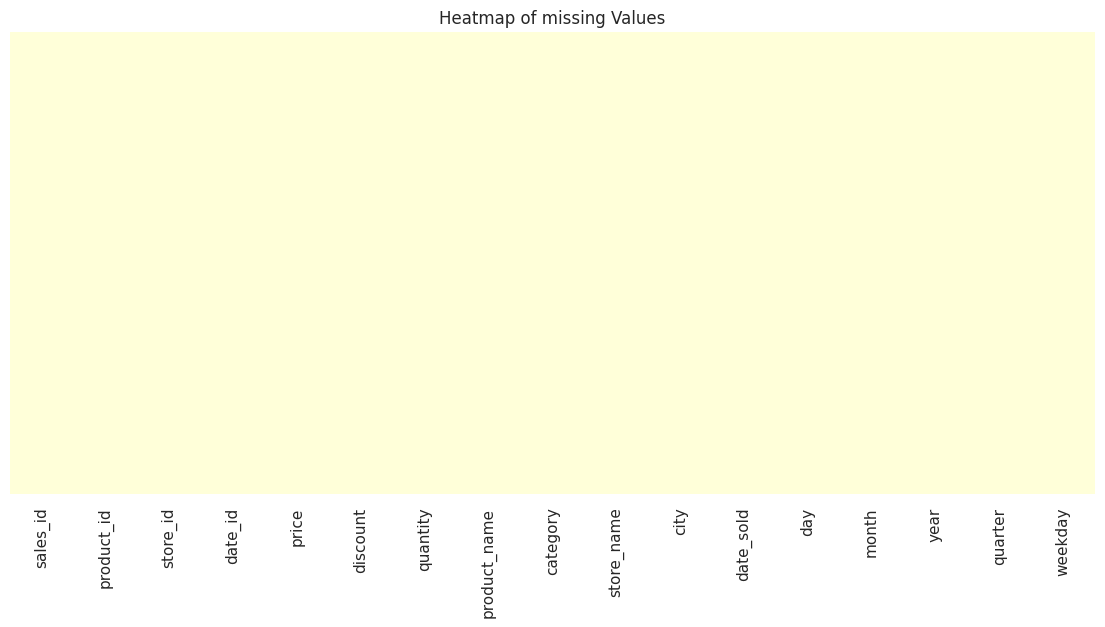

In [43]:
#Step 3: Visualize Null Values (Heatmap)

plt.figure(figsize=(14, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='YlGnBu', yticklabels=False)
plt.title("Heatmap of missing Values")
plt.show()


In [44]:
# Summary statistics of numeric columns
df.describe()

,sales_id,product_id,store_id,price,discount,quantity,day,month,year,quarter
count,1.900000e+04,19000.000000,19000.000000,19000.000000,19000.000000,19000.000000,19000.000000,19000.000000,19000.0,19000.000000
mean,5.766500e+06,301.464211,1.947368,872.194485,0.207354,8.094947,15.664105,4.284053,2025.0,1.761737
std,5.484972e+03,178.981944,0.825516,1368.104534,0.124318,4.983993,8.712871,1.763505,0.0,0.662007
min,5.757001e+06,5.000000,1.000000,3.000000,0.000000,1.000000,1.000000,1.000000,2025.0,1.000000
25%,5.761751e+06,162.000000,1.000000,85.230000,0.100000,4.000000,8.000000,3.000000,2025.0,1.000000
50%,5.766500e+06,289.000000,2.000000,167.810000,0.200000,8.000000,16.000000,4.000000,2025.0,2.000000
75%,5.771250e+06,434.000000,3.000000,1031.995000,0.300000,11.000000,23.000000,6.000000,2025.0,2.000000
max,5.776000e+06,628.000000,3.000000,4999.250000,0.500000,20.000000,31.000000,7.000000,2025.0,3.000000


In [45]:
# Check for duplicate rows (rare, but good to check)
df.duplicated().sum()

np.int64(0)

## 💸3. Sales Performance Analysis We’ll cover:

- Total revenue

- Daily/monthly revenue trends

- Sales volume over time

- Seasonality detection (month & day-of-week trends)

### Step 1: Add Revenue column

In [46]:

#revenue = (price - discount * price) * quantity

df['net_price'] = df['price'] * (1 - df['discount'])
df['revenue'] = df['net_price'] * df['quantity']

### Step 2: Total revenue 

In [47]:

total_revenue = df['revenue'].sum()
print(f"Total Revenue: QAR {total_revenue:,.2f}")

Total Revenue: QAR 73,594,008.40


### Step 3: Revenue by Month


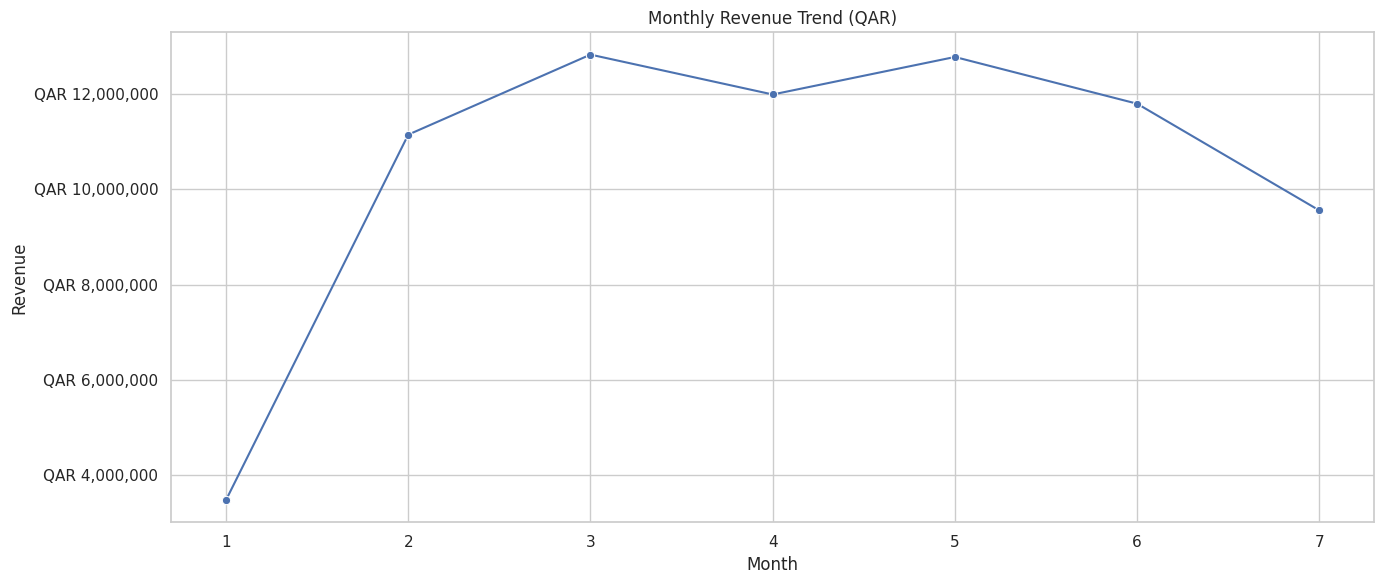

In [54]:
#ensure date_sold is in datetime format 
df['date_sold'] = pd.to_datetime(df['date_sold'])

#extract monthly revenue 
monthly_revenue = df.groupby('month')['revenue'].sum().reset_index()
monthly_revenue['month'] = monthly_revenue['month'].astype(str)

#plot
plt.figure(figsize=(14,6))
ax = sns.lineplot(data=monthly_revenue, x='month', y='revenue', marker='o')

def format_qatari_currency(x, pos):
    return f"QAR {x:,.0f}"  # formats like QAR 123,456

ax.yaxis.set_major_formatter(mtick.FuncFormatter(format_qatari_currency))
plt.title("Monthly Revenue Trend (QAR)")
plt.ylabel("Revenue")
plt.xlabel("Month")
plt.tight_layout()
plt.show()

### Step 4: Daily Sales Volume Trend

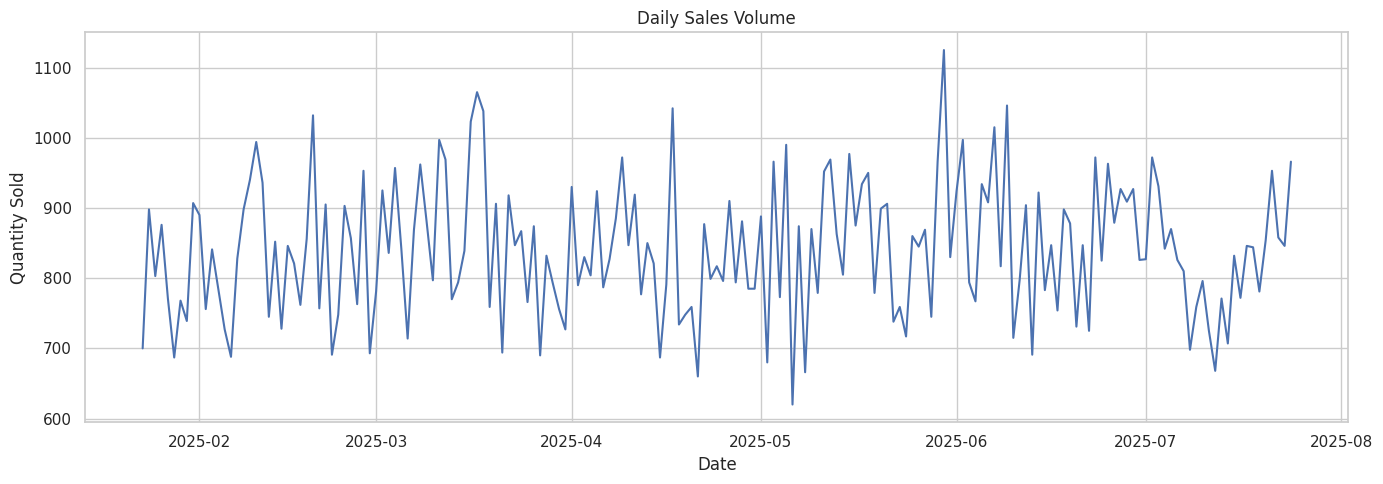

In [67]:
daily_sales = df.groupby('date_sold')['quantity'].sum().reset_index()


plt.figure(figsize=(14,5))
sns.lineplot(data=daily_sales, x='date_sold' ,y='quantity')
plt.title("Daily Sales Volume")
plt.ylabel("Quantity Sold")
plt.xlabel("Date")
plt.tight_layout()
plt.show()

### Step 5: Seasonality Check (by Month and Weekday)

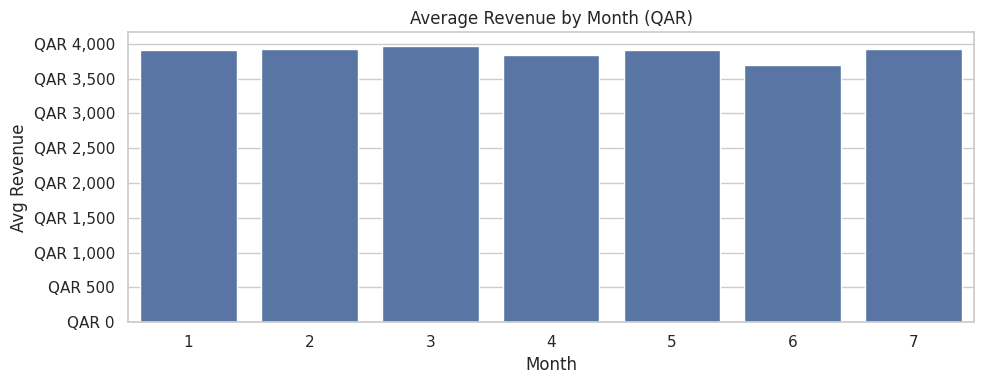

In [71]:
# average revenue by month 
monthly_avg = df.groupby('month')['revenue'].mean().reset_index()

plt.figure(figsize=(10, 4))
ax = sns.barplot(data=monthly_avg, x='month', y='revenue')

ax.yaxis.set_major_formatter(mtick.FuncFormatter(format_qatari_currency))


plt.title("Average Revenue by Month (QAR)")
plt.xlabel("Month")
plt.ylabel("Avg Revenue")
plt.tight_layout()
plt.show()

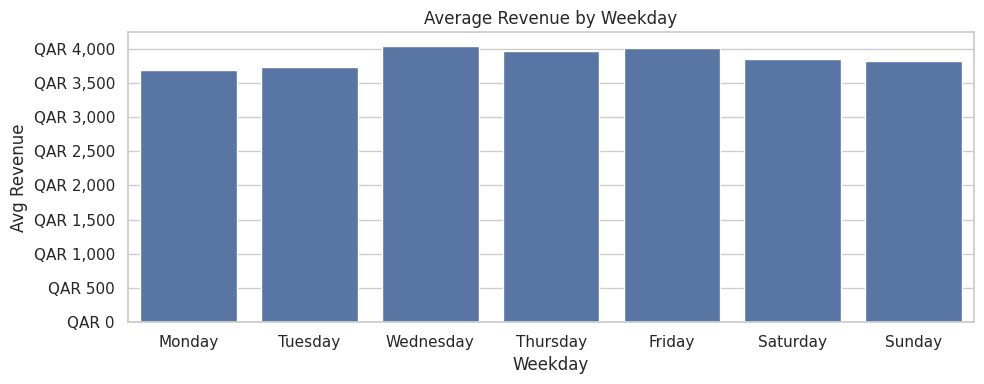

In [72]:
# Average Revenue by weekday
weekday_avg = df.groupby('weekday')['revenue'].mean().reset_index()

# reorder weekdays
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_avg['weekday'] = pd.Categorical(weekday_avg['weekday'], categories=weekday_order, ordered=True)
weekday_avg = weekday_avg.sort_values('weekday')

#plot
plt.figure(figsize=(10, 4))
ax = sns.barplot(data=weekday_avg, x='weekday', y='revenue')

ax.yaxis.set_major_formatter(mtick.FuncFormatter(format_qatari_currency))

plt.title("Average Revenue by Weekday")
plt.xlabel("Weekday")
plt.ylabel("Avg Revenue")
plt.tight_layout()
plt.show()

## 4.Correlation & Outlier Analysis

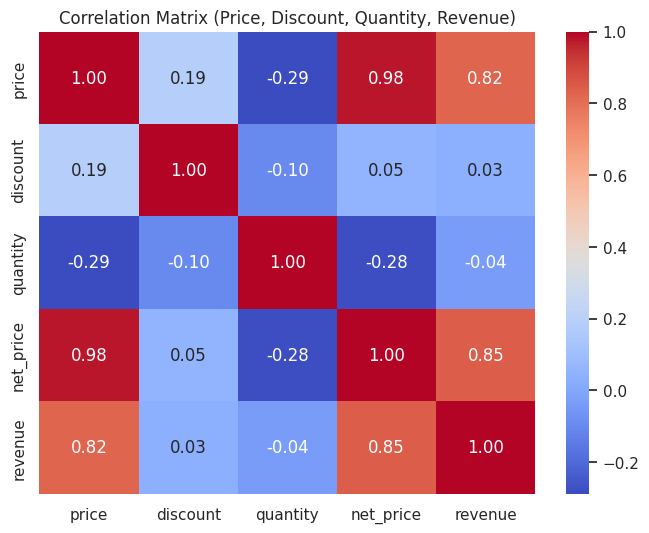

In [73]:
# selecting numeric columns for correlation

corr_cols = ['price','discount','quantity','net_price','revenue']
corr_matrix = df[corr_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix (Price, Discount, Quantity, Revenue)")
plt.show()

### What to Look for in a correlation Matrix:
1. **Price vs Quantity** : weak negetive corr. (As the price increases, the quantity sold tends to decreses- but not strongly. the relationship exists, but it's not very strong or predictive.)

2. **Discount vs Revenue** : weak positive corr. Discounts are slightly associated with higher revenue, but the effect is not strong. It suggests that discounting could help increase sales volume, but not always enough to significantly boost revenue.

3. **Quantity vs Revenue** : A weak negative correlation suggests that higher sales volume might be happening at lower prices, leading to lower overall revenue — possibly due to bulk discounts or low-margin products.

4. **Discount vs Quantity** : Weak negative correlation suggests discounts are not consistently increasing purchase quantities. This may point to ineffective discount strategies or discounts applied to non-responsive products.

#### 📊 1. Price vs Quantity Scatter Plot

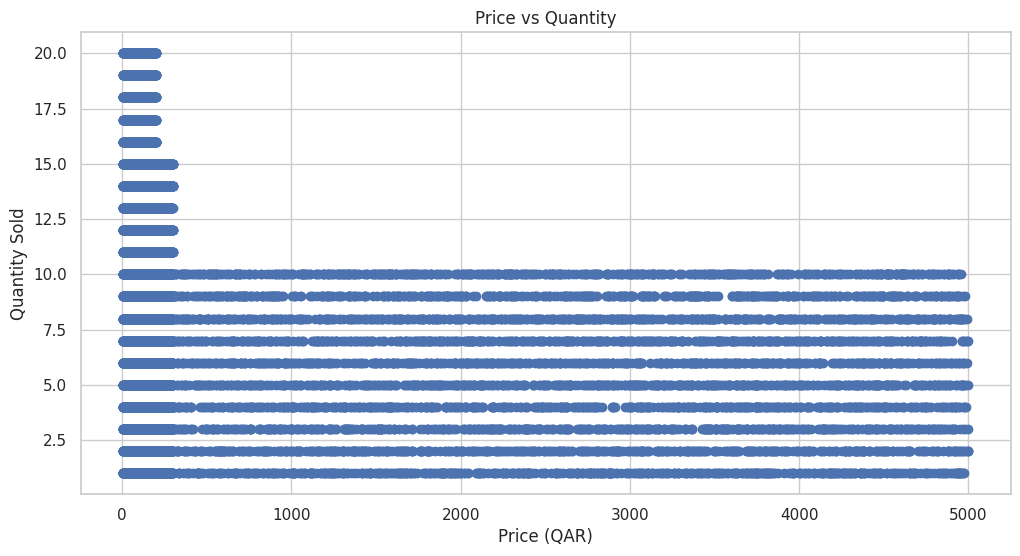

In [75]:
plt.scatter(df['price'], df['quantity'])
plt.xlabel('Price (QAR)')
plt.ylabel('Quantity Sold')
plt.title('Price vs Quantity')
plt.grid(True)
plt.show()

#### 📉 2. Discount vs Revenue Scatter Plot

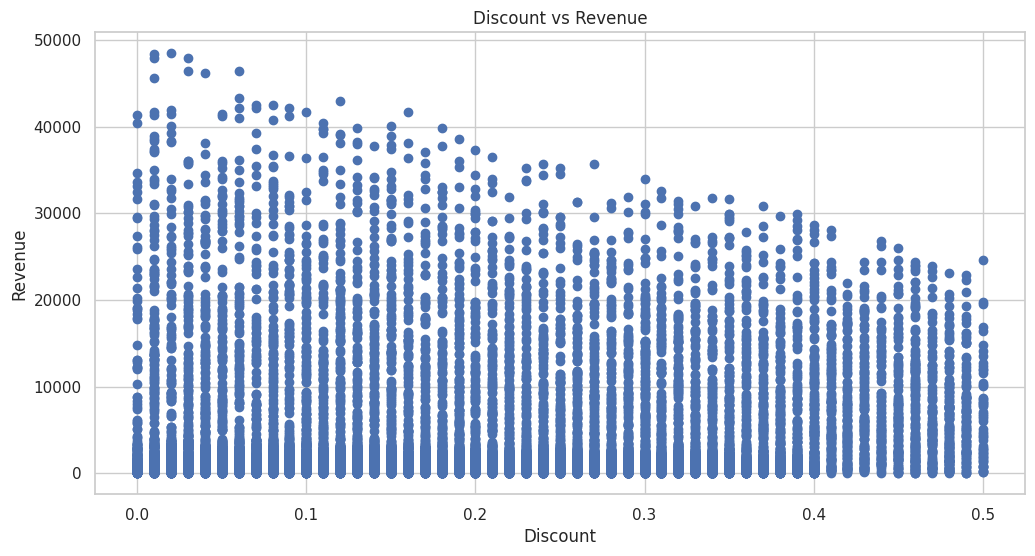

In [77]:
plt.scatter(df['discount'], df['revenue'])
plt.xlabel('Discount')
plt.ylabel('Revenue')
plt.title('Discount vs Revenue')
plt.grid(True)
plt.show()

#### 📈 3. Quantity vs Revenue Scatter Plot

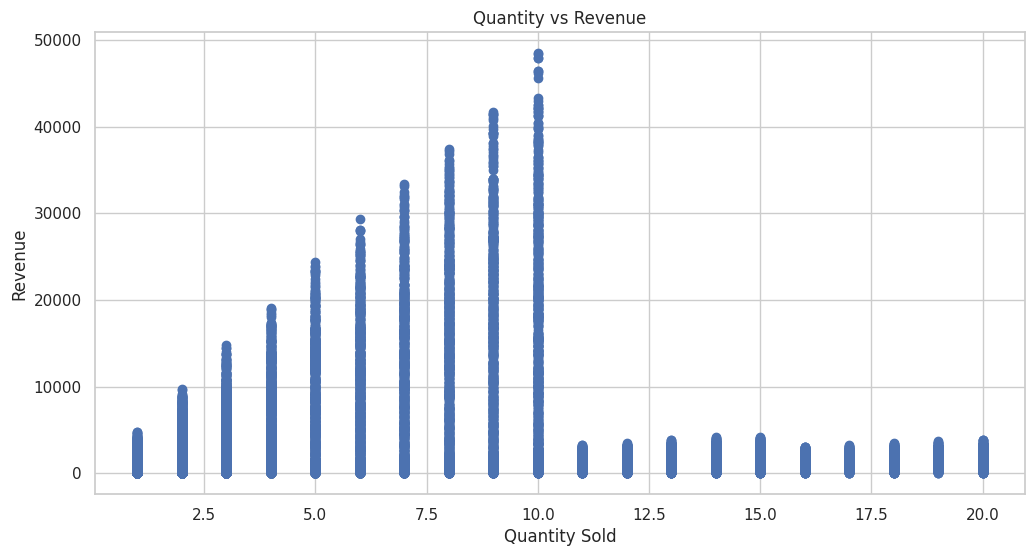

In [79]:
plt.scatter(df['quantity'], df['revenue'])
plt.xlabel('Quantity Sold')
plt.ylabel('Revenue')
plt.title('Quantity vs Revenue')
plt.grid(True)
plt.show()

#### 📦 4. Distribution Plots (Histograms)

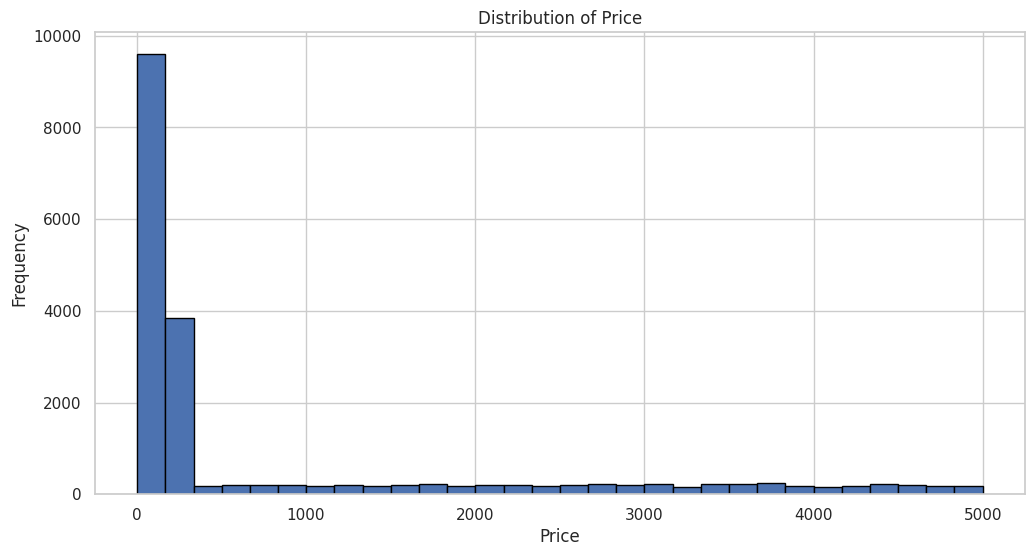

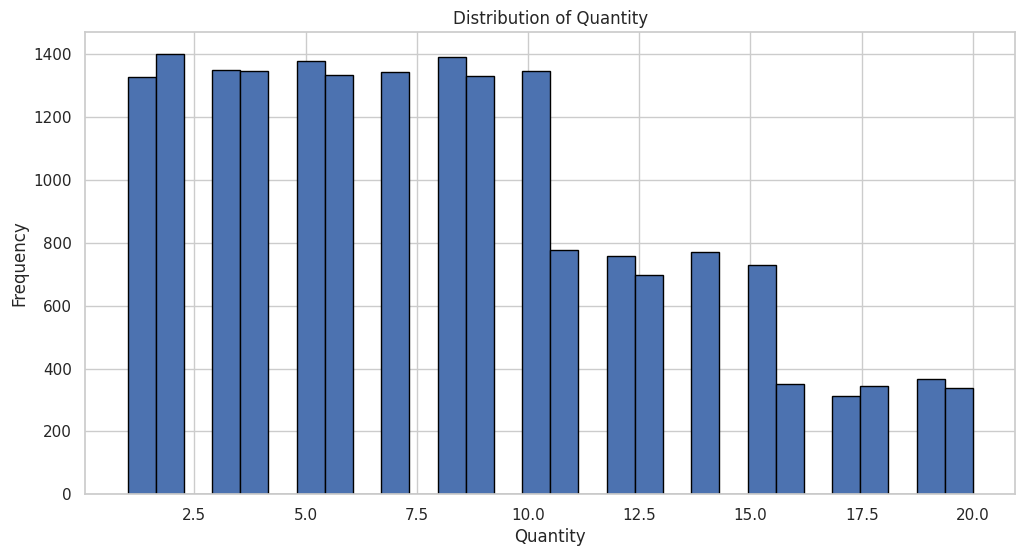

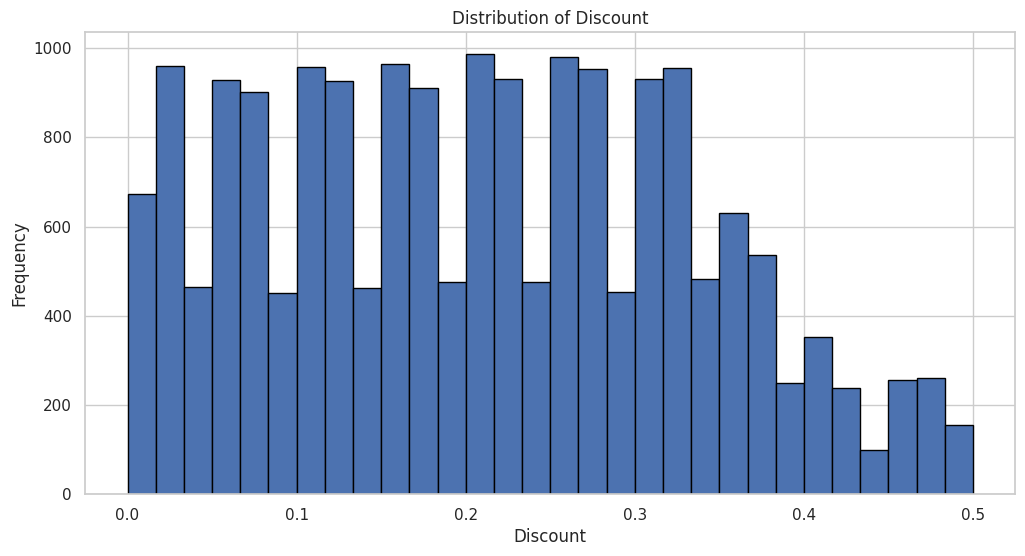

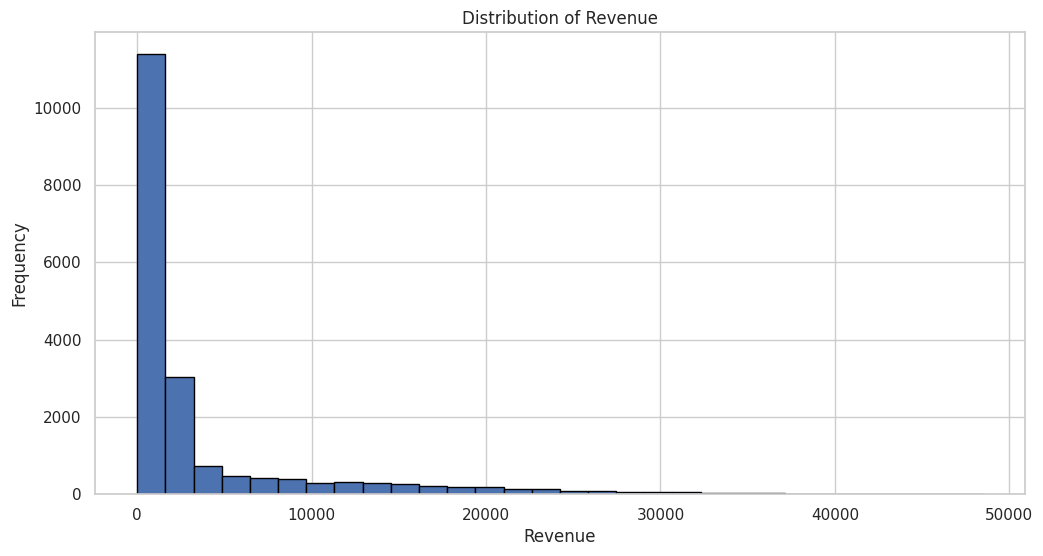

In [80]:
columns = ['price', 'quantity', 'discount', 'revenue']
for col in columns:
    plt.hist(df[col], bins=30, edgecolor='black')
    plt.title(f'Distribution of {col.capitalize()}')
    plt.xlabel(col.capitalize())
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

#### 🛍️ 5. Revenue by Store (if store_id available)

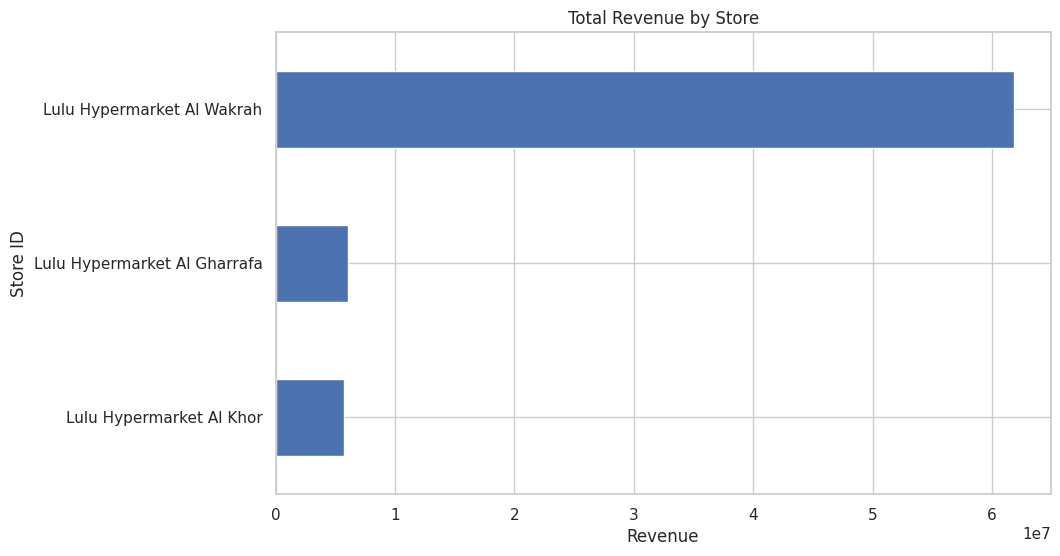

In [105]:
store_revenue = df.groupby('store_name')['revenue'].sum().sort_values()

store_revenue.plot(kind='barh', figsize=(10,6))
plt.title('Total Revenue by Store')
plt.xlabel('Revenue')
plt.ylabel('Store ID')
plt.grid(True)
plt.show()

## What we have done this far : 
- Cleaned your data ✅

- Created a correlation matrix ✅

- Analyzed some initial insights ✅

- Plotted basic distributions ✅

#### Step 1: Sales Trend Over Time

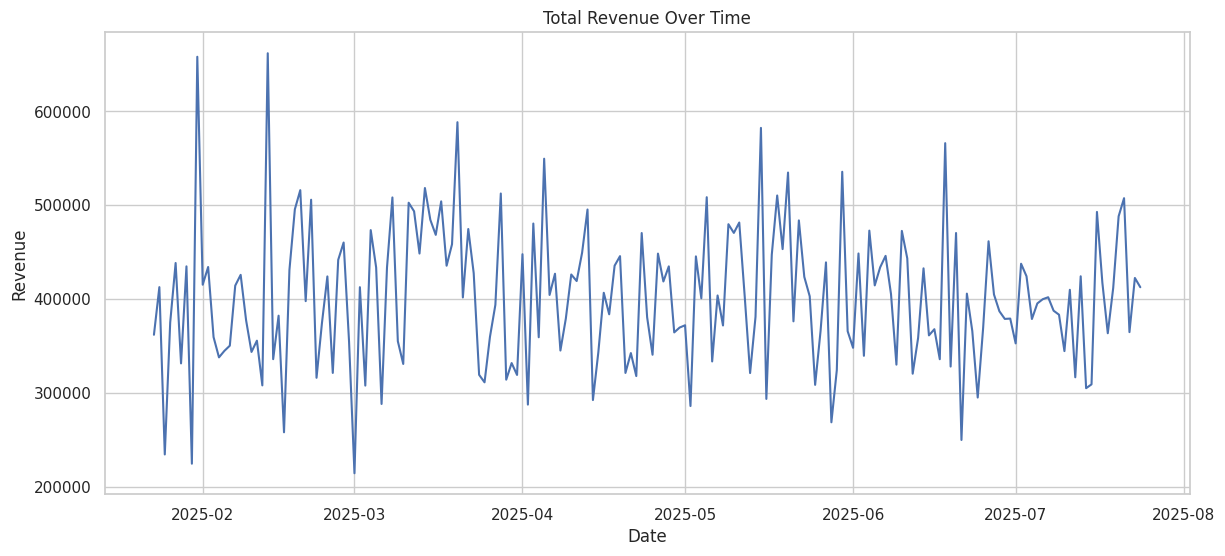

In [87]:
sales_over_time = df.groupby('date_id')['revenue'].sum()

plt.figure(figsize=(14,6))
sales_over_time.plot()
plt.title('Total Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

#### Step 2: Top Selling Products

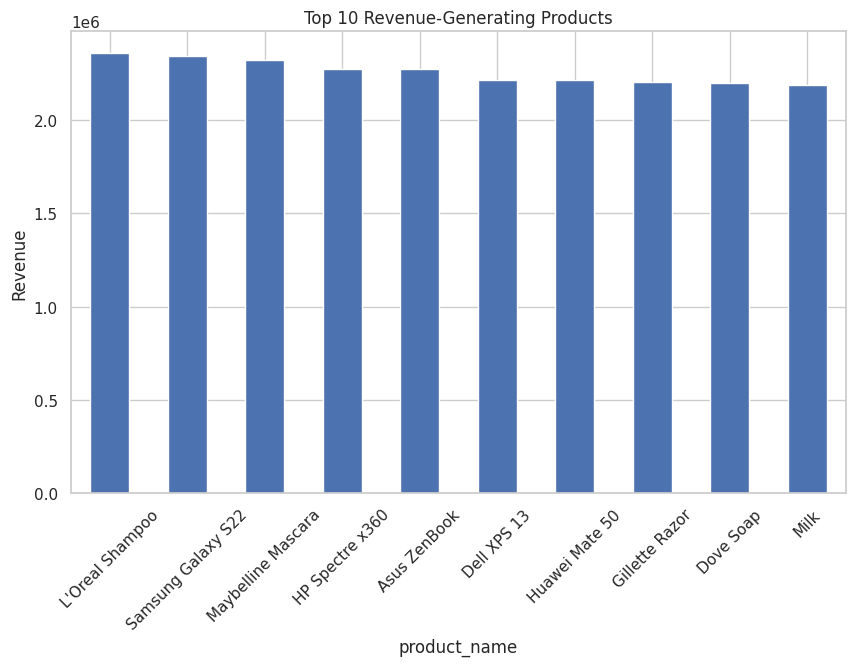

In [89]:
top_products = df.groupby('product_name')['revenue'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
top_products.plot(kind='bar')
plt.title('Top 10 Revenue-Generating Products')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()

#### Step 3: Store-wise Performance

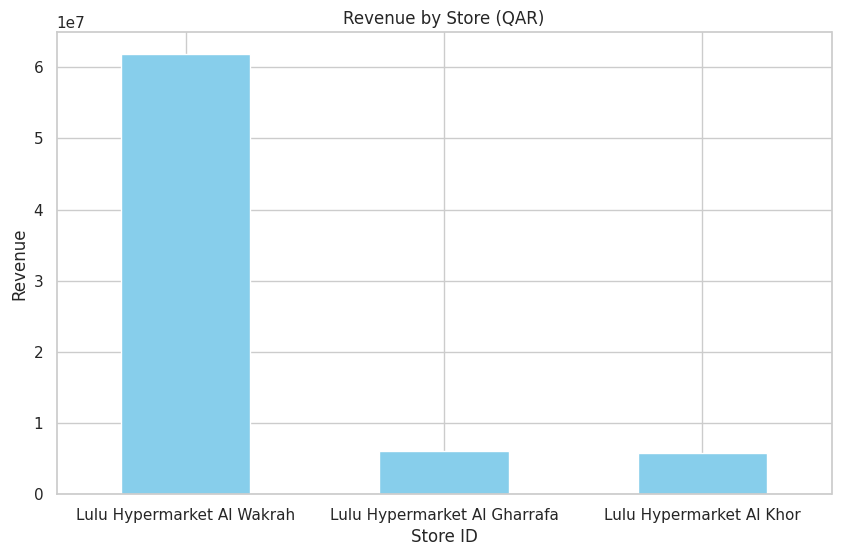

In [92]:
store_performance = df.groupby('store_name')['revenue'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
store_performance.plot(kind='bar', color='skyblue')
plt.title('Revenue by Store (QAR)')
plt.xlabel('Store ID')
plt.ylabel('Revenue')
plt.xticks(rotation=0)
plt.show()

#### Step 4: Impact of Discount on Quantity

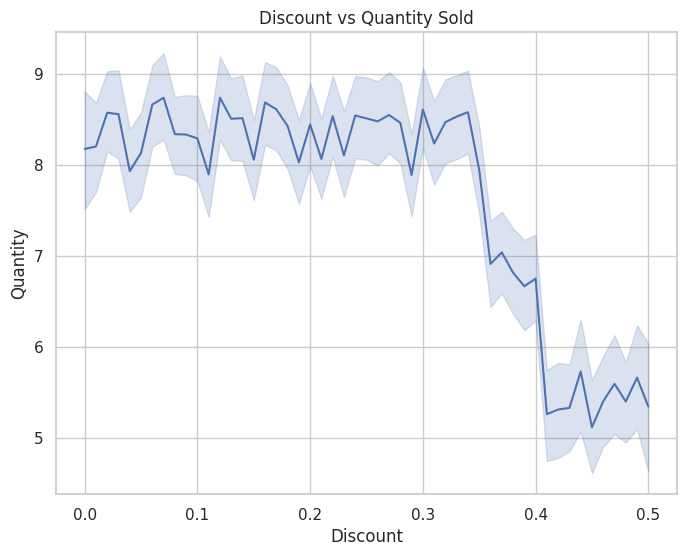

In [98]:
plt.figure(figsize=(8,6))
sns.lineplot(data=df, x='discount', y='quantity')
plt.title('Discount vs Quantity Sold')
plt.xlabel('Discount')
plt.ylabel('Quantity')
plt.grid(True)
plt.show()

## ✅ Simulated Segment Analysis Based on Store and Product Behavior


### 1. Segment by Store Type

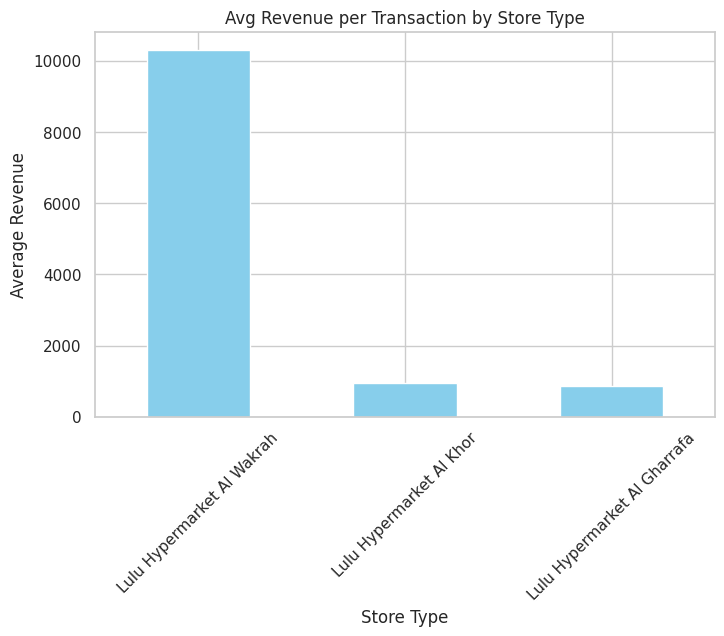

In [ ]:
# Avg Revenue Per Transaction

store_type_revenue = df.groupby('store_name')['revenue'].mean().sort_values(ascending=False)

plt.figure(figsize=(8,5))
store_type_revenue.plot(kind='bar', color='skyblue')
plt.title('Avg Revenue per Transaction by Store Type')
plt.ylabel('Average Revenue')
plt.xlabel('Store Type')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#### Quantity Sold by Store Type

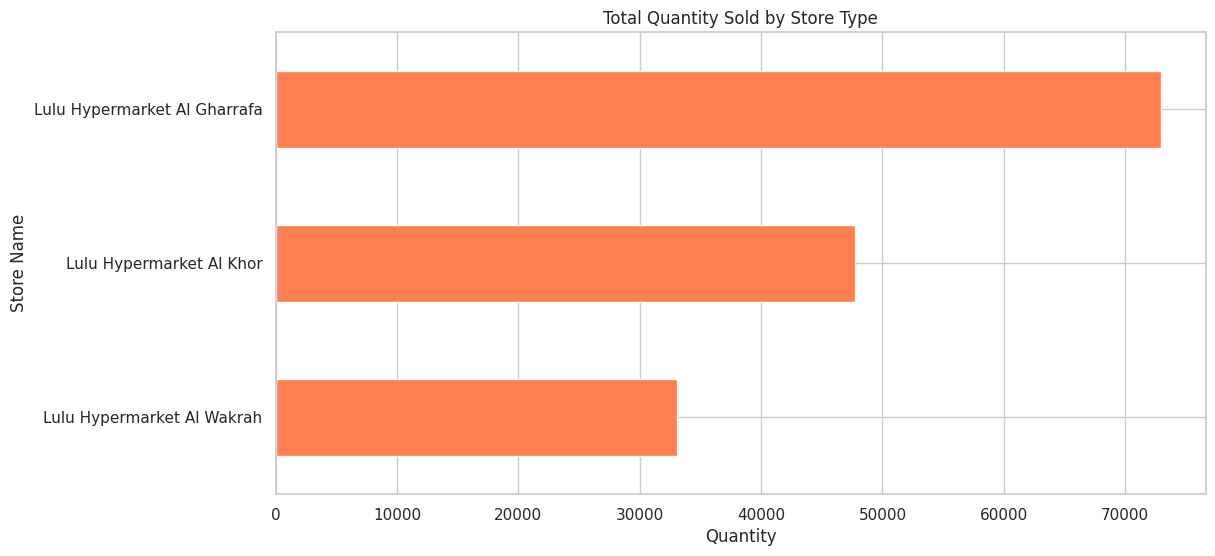

In [107]:
qty_by_store_type = df.groupby('store_name')['quantity'].sum().sort_values()

qty_by_store_type.plot(kind='barh', color='coral')
plt.title('Total Quantity Sold by Store Type')
plt.xlabel('Quantity')
plt.ylabel('Store Name')
plt.grid(True)
plt.show()

### 2.Segment by Product Category

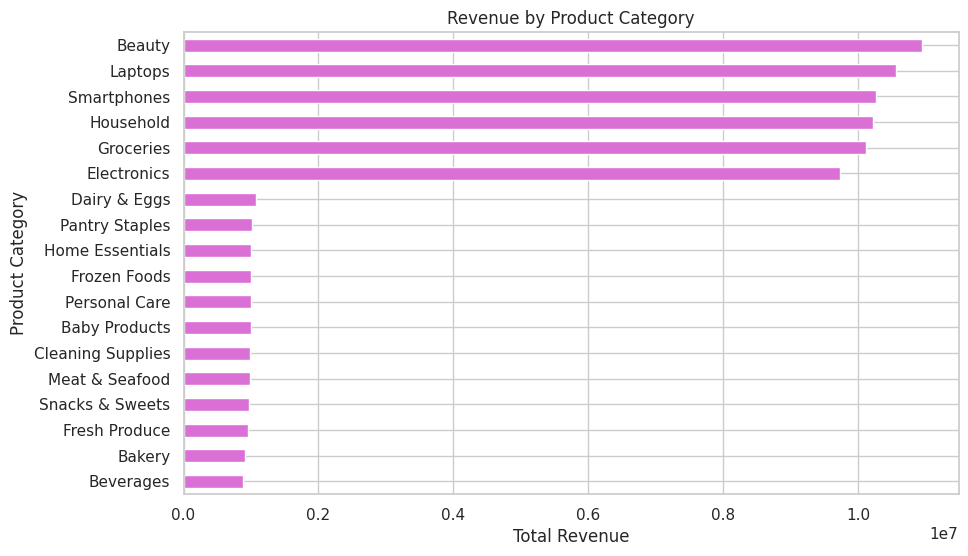

In [109]:
# Revenue By Product Category

revenue_by_category = df.groupby('category')['revenue'].sum().sort_values()

plt.figure(figsize=(10,6))
revenue_by_category.plot(kind='barh', color='orchid')
plt.title('Revenue by Product Category')
plt.xlabel('Total Revenue')
plt.ylabel('Product Category')
plt.grid(True)
plt.show()

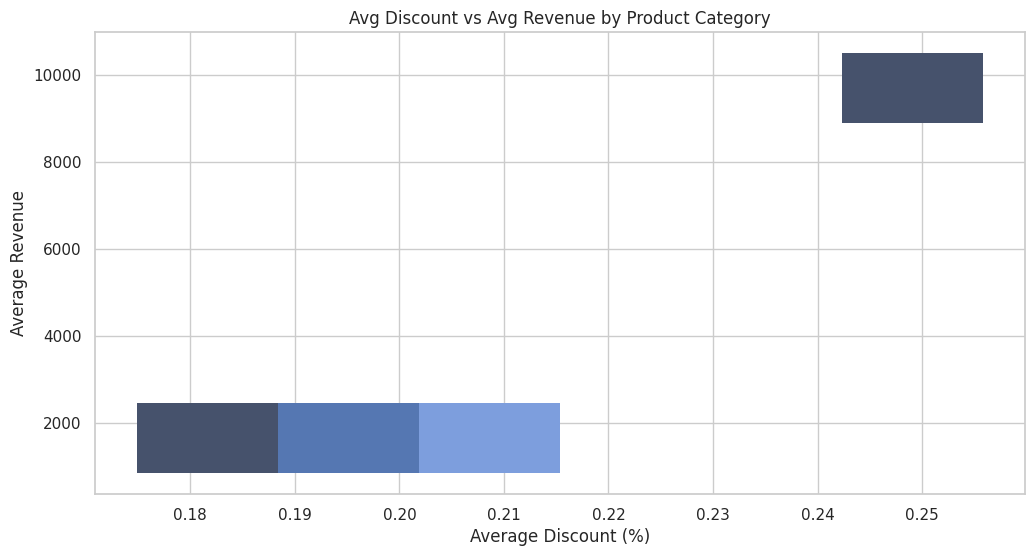

In [113]:
# Discount Sensitivity per category
discount_impact = df.groupby('category')[['discount' , 'revenue']].mean()

sns.histplot(data=discount_impact, x='discount', y='revenue')
plt.title('Avg Discount vs Avg Revenue by Product Category')
plt.xlabel('Average Discount (%)')
plt.ylabel('Average Revenue')
plt.grid(True)
plt.show()

#### Top Performing Categories per Store

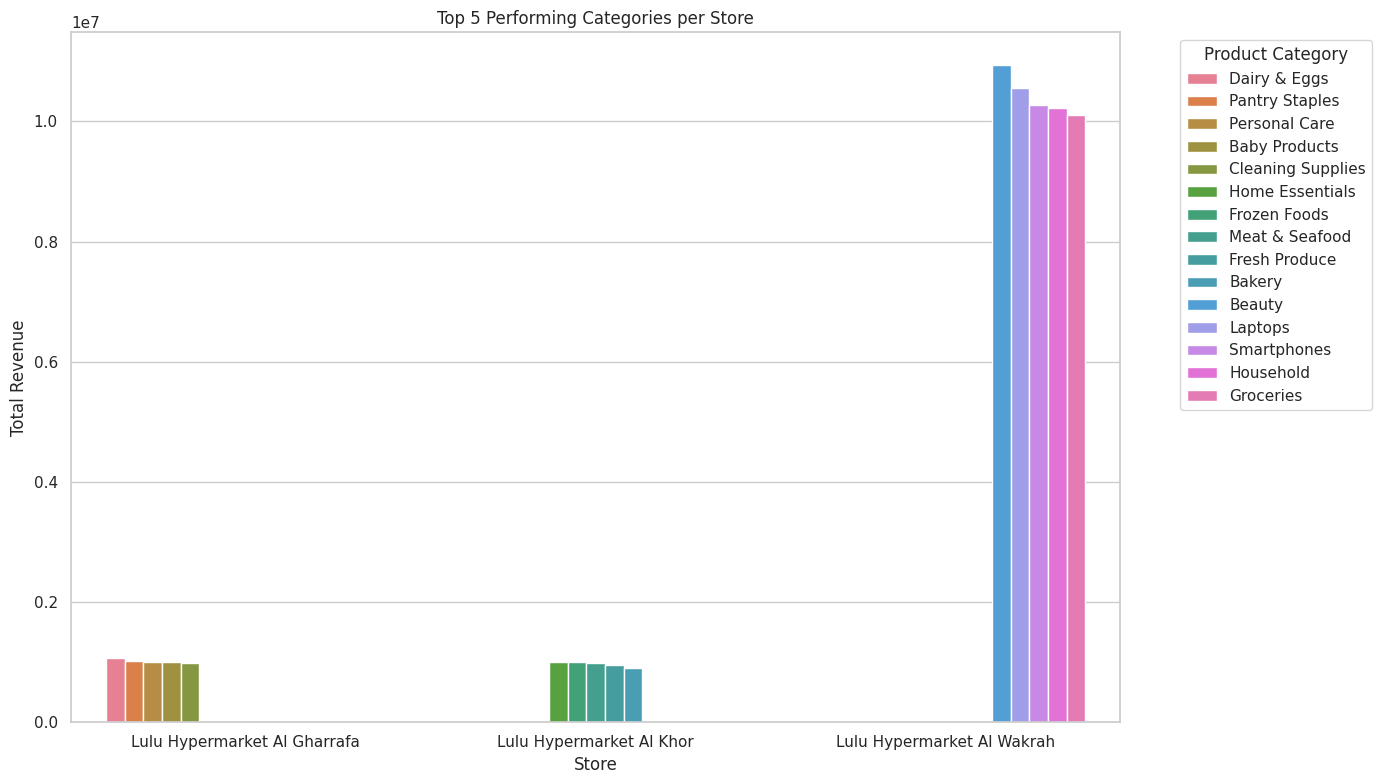

In [120]:
store_category_top = df.groupby(['store_name', 'category'])['revenue'].sum().reset_index()


store_category_top['rank'] = store_category_top.groupby('store_name')['revenue'].rank(method='first', ascending=False)

top_n = 5 #top 5 product, change if needed

top_categories_per_store = store_category_top[store_category_top['rank'] <= top_n]

top_categories_per_store.sort_values(['store_name' , 'rank'], inplace=True)
top_categories_per_store.reset_index(drop=True, inplace=True)

plt.figure(figsize=(14, 8))
sns.barplot(
    data=top_categories_per_store,
    x='store_name',
    y='revenue',
    hue='category'
)
plt.title("Top 5 Performing Categories per Store")
plt.ylabel("Total Revenue")
plt.xlabel("Store")
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



In [123]:
os.makedirs("exported_data", exist_ok=True)

# Export the merged dataframe used for EDA
df.to_csv('exported_data/merged_sales_data.csv', index=False)

# key summaries:
top_categories_per_store.to_csv('exported_data/top_categories_per_store.csv', index=False)